In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet("detection_results_validation.parquet")

In [3]:
df

,filename,classid,score,x1,y1,x2,y2
0,/workspace/yolo_v8_training/oiv7_full/validati...,0,0.884456,350,3,711,599
1,/workspace/yolo_v8_training/oiv7_full/validati...,0,0.879914,699,137,1004,892
2,/workspace/yolo_v8_training/oiv7_full/validati...,0,0.876619,17,84,314,541
3,/workspace/yolo_v8_training/oiv7_full/validati...,0,0.454092,891,333,1021,864
4,/workspace/yolo_v8_training/oiv7_full/validati...,1,0.822789,923,328,1001,454
...,...,...,...,...,...,...,...
85749,/workspace/yolo_v8_training/oiv7_full/validati...,2,0.511368,568,758,718,887
85750,/workspace/yolo_v8_training/oiv7_full/validati...,3,0.885203,260,37,434,337
85751,/workspace/yolo_v8_training/oiv7_full/validati...,0,0.842931,239,254,372,602
85752,/workspace/yolo_v8_training/oiv7_full/validati...,1,0.682572,307,259,353,336


## Class Mappings
```
0 - 'person'
1 - 'head'
2 - 'hand'
3 - 'face'
```

In [4]:
df = df.sample(10)

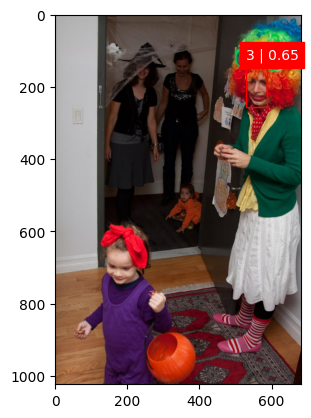

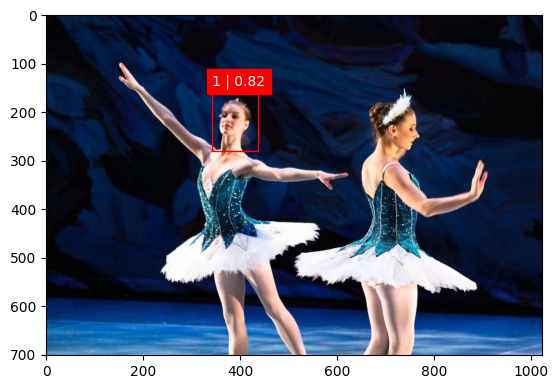

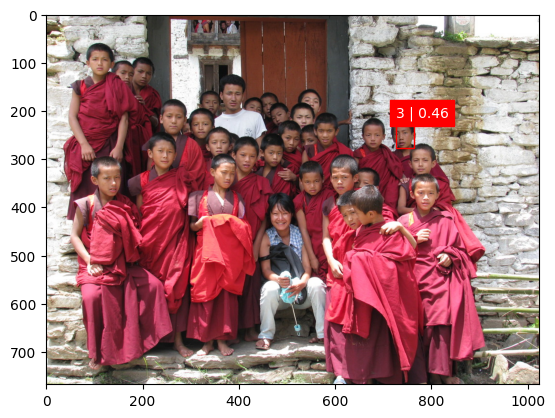

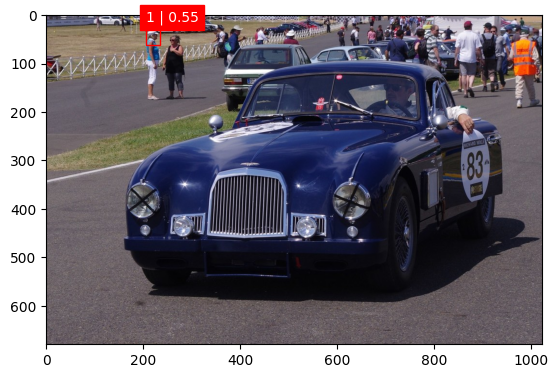

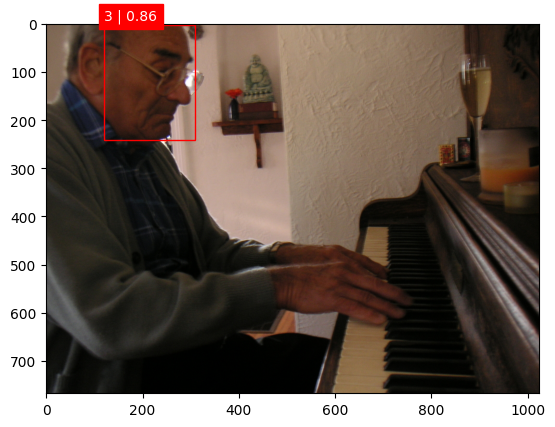

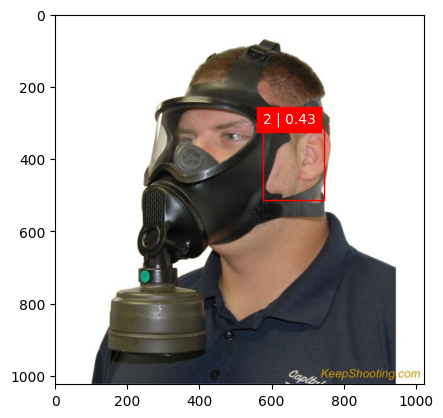

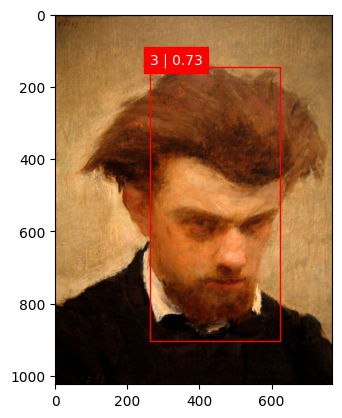

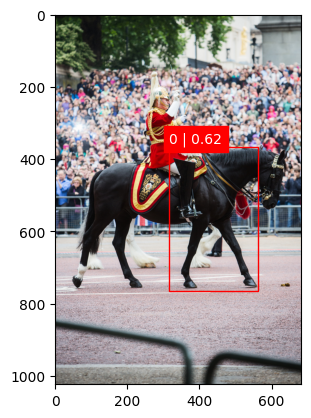

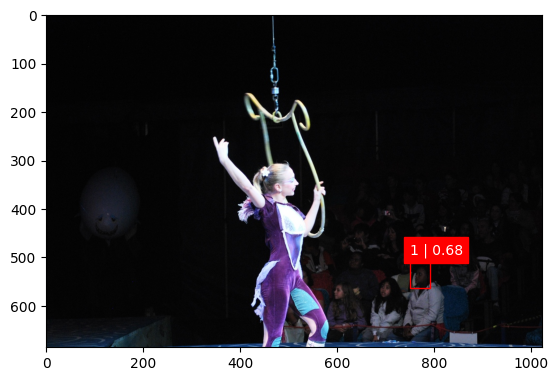

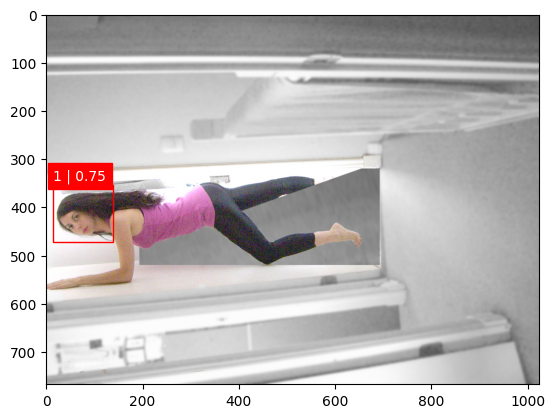

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from PIL import Image


# Loop through dataframe to plot bounding boxes
for index, row in df.iterrows():
    fig, ax = plt.subplots(1)

    img = Image.open(row["filename"])
    ax.imshow(img)


    # Extract bounding box
    x1, y1, x2, y2, classid, score = row["x1"], row["y1"], row["x2"], row["y2"], row["classid"], row["score"]
    width = x2 - x1
    height = y2 - y1
    
    # Create a Rectangle patch
    rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    label = f'{classid} | {score:.2f}'
    ax.text(x1, y1-10, label, color='white', backgroundcolor='red')

plt.show()